## Download datasets

In [2]:
from config import download_and_save_json, DATASET_PRODUCTS_URL, DATASET_CATEGORIES_URL

download_and_save_json(DATASET_PRODUCTS_URL, 'products.json')
download_and_save_json(DATASET_CATEGORIES_URL, 'categories.json')

File saved at: c:\Users\rim18\OneDrive\Documentos\GitHub\Final-Project-Anyone-AI---Automated-product-categorization-for-e-commerce-with-AI\dataset\products.json
File saved at: c:\Users\rim18\OneDrive\Documentos\GitHub\Final-Project-Anyone-AI---Automated-product-categorization-for-e-commerce-with-AI\dataset\categories.json


## Data products

Here we will download the datasets 'products.json' and 'categories.json'. For performing EDA, we wil use 'products.json'. By running the bloks bellow, you wil obtain an automated analysis of the original dataset.


===============Dataset Information:===============


,Column,Non-Null Count,Dtype
0,"RangeIndex: 51646 entries,",0,51645
1,0 sku,51646,int64
2,1 name,51645,object
3,2 type,51646,object
4,3 price,51646,float64
5,4 upc,51646,int64
6,5 category,51646,object
7,6 shipping,51646,object
8,7 description,51646,object
9,8 manufacturer,51584,object



======Category Level Descriptive Statistics:======


,count,mean,std,min,25%,50%,75%,max
sku,51646.0,5.390847e+06,2.413956e+06,4.390000e+04,4.212146e+06,4.901758e+06,7.264479e+06,9.999678e+06
price,51646.0,2.513559e+02,5.769546e+02,1.000000e-02,2.499000e+01,5.999000e+01,1.999900e+02,2.799998e+04
upc,51646.0,7.440240e+11,1.125934e+12,8.404103e+09,8.642927e+10,7.471921e+11,8.404690e+11,9.788884e+12





======================First row of the result after counting category levels:=======================


,sku,name,type,price,upc,category,shipping,description,manufacturer,model,...,subcat3_name,subcat4_id,subcat4_name,subcat5_id,subcat5_name,subcat6_id,subcat6_name,subcat7_id,subcat7_name,category_level
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,...,Household Batteries,abcat0208002,Alkaline Batteries,None,None,None,None,None,None,4





======================Plots:======================


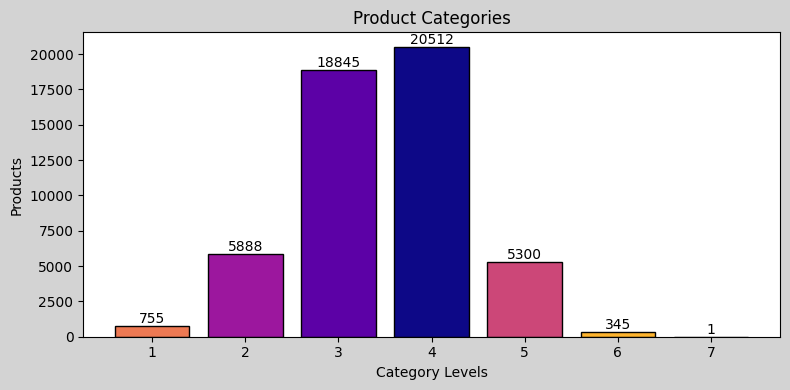

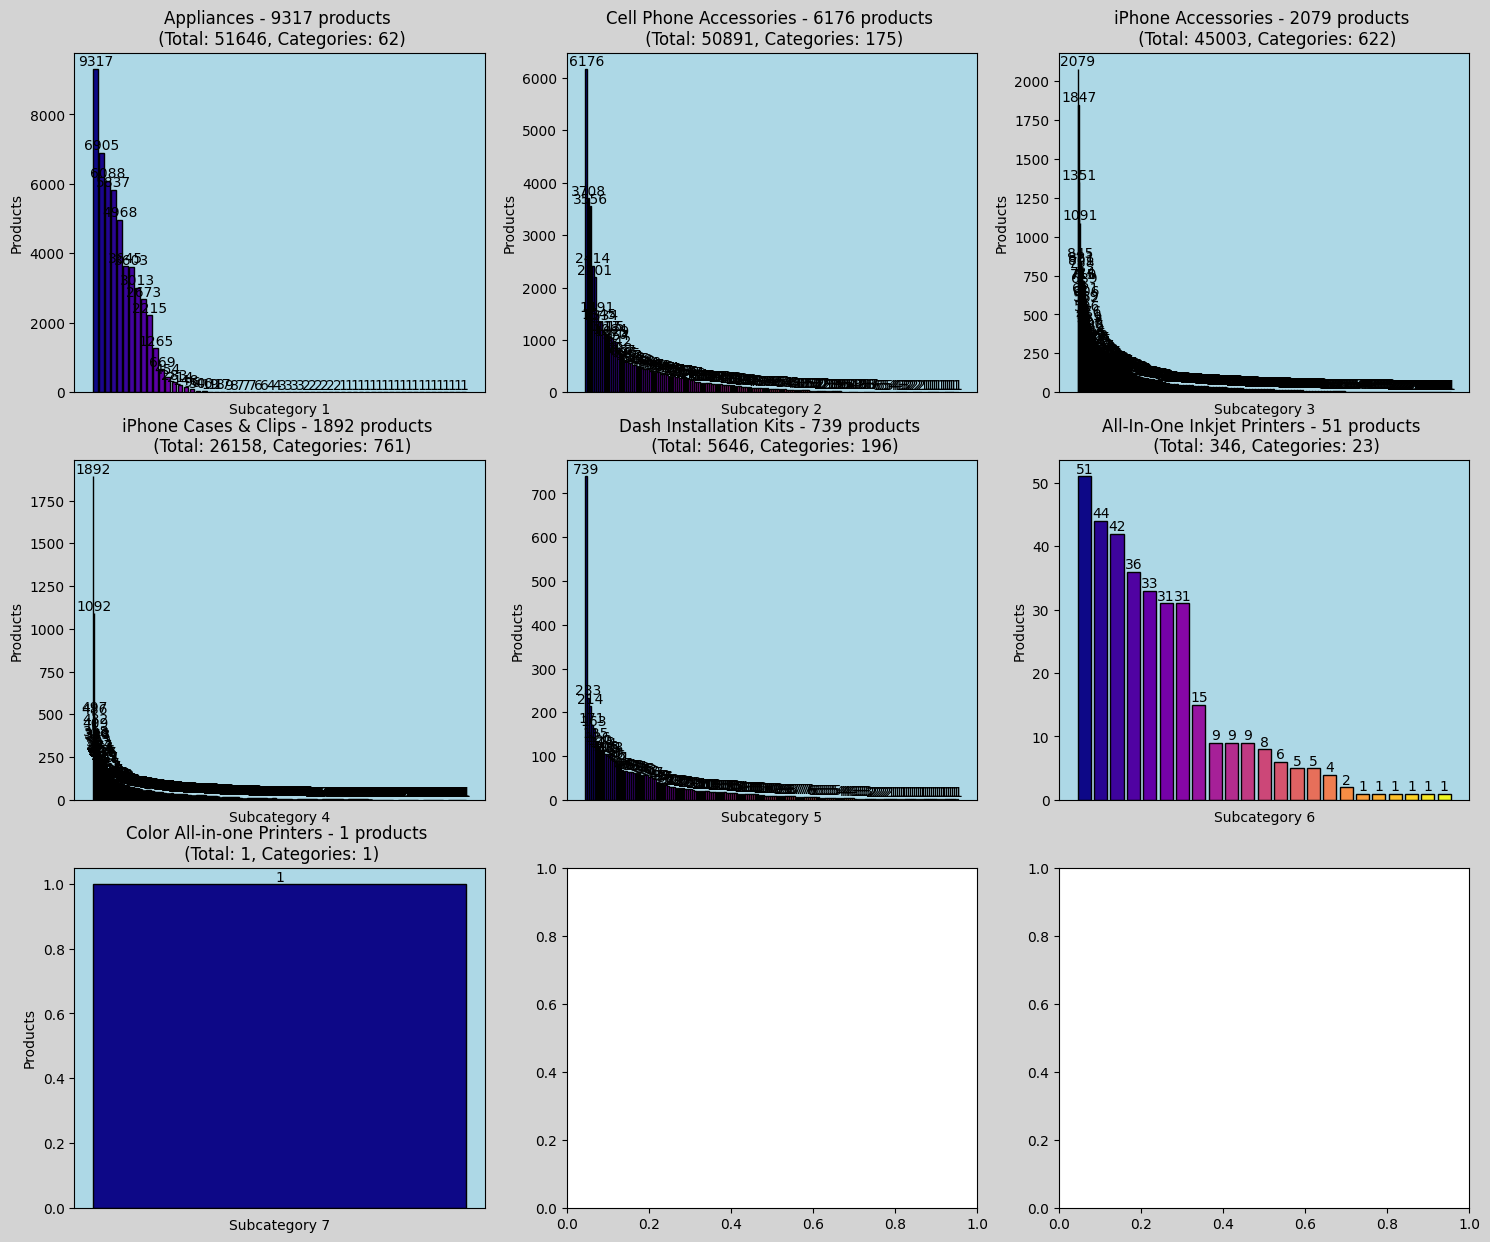

In [2]:
import src.EDA as eda

analize = eda.process_product_data("C:/Users/rim18/OneDrive/Documentos/GitHub/Final-Project-Anyone-AI---Automated-product-categorization-for-e-commerce-with-AI/dataset/products.json")
visualize = eda.plot_product_data(analize)


## Data transforming


In [3]:
import src.dataset_transform as dt 
datas = dt.transform_dataset('C:/Users/rim18/OneDrive/Documentos/GitHub/Final-Project-Anyone-AI---Automated-product-categorization-for-e-commerce-with-AI/dataset/products.json')
data_final_json = 'C:/Users/rim18/OneDrive/Documentos/GitHub/Final-Project-Anyone-AI---Automated-product-categorization-for-e-commerce-with-AI/dataset/processed_data.json'
datas.to_json(data_final_json, orient='records', lines=True)

This is where we will perform automated data cleaning and filtering, resulting in a new EDA report based on this transformed DataFrame.


===============Dataset Information:===============


,Column,Non-Null Count,Dtype
0,"RangeIndex: 51646 entries,",0,51645
1,0 name,51645,object
2,1 type,51646,object
3,2 description,51646,object
4,3 image,51646,object
5,4 subcat1_name,51646,object
6,5 subcat2_name,50891,object
7,6 subcat3_name,45003,object
8,7 subcat4_name,26158,object
9,8 subcat5_name,5646,object



=============Descriptive Statistics:==============


,count,unique,top,freq
name,51645,48557,Lenmar - Lithium-Ion Battery - Black,31
type,51646,6,HardGood,46103
description,51646,38537,Perfect gift card? Piece of cake. All Best Buy...,370
image,51646,51646,43900.jpg,1
subcat1_name,51646,13,Appliances,9317
subcat2_name,50891,25,Other,15697
subcat3_name,45003,20,Other,28751
subcat4_name,26158,17,Other,18224
subcat5_name,5646,31,Other,1972





======================First row of the result after counting category levels:=======================


,name,type,description,image,subcat1_name,subcat2_name,subcat3_name,subcat4_name,subcat5_name,category_level
0,Duracell - AAA Batteries (4-Pack),HardGood,Compatible with select electronic devices; AAA...,43900.jpg,Connected Home & Housewares,Housewares,Other,Other,None,4





======================Plots:======================


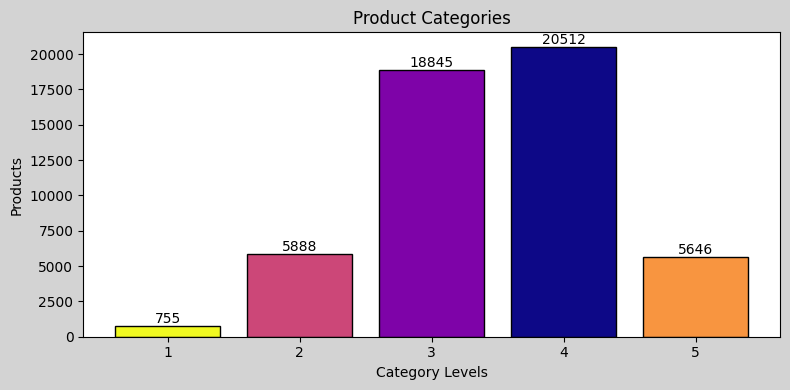

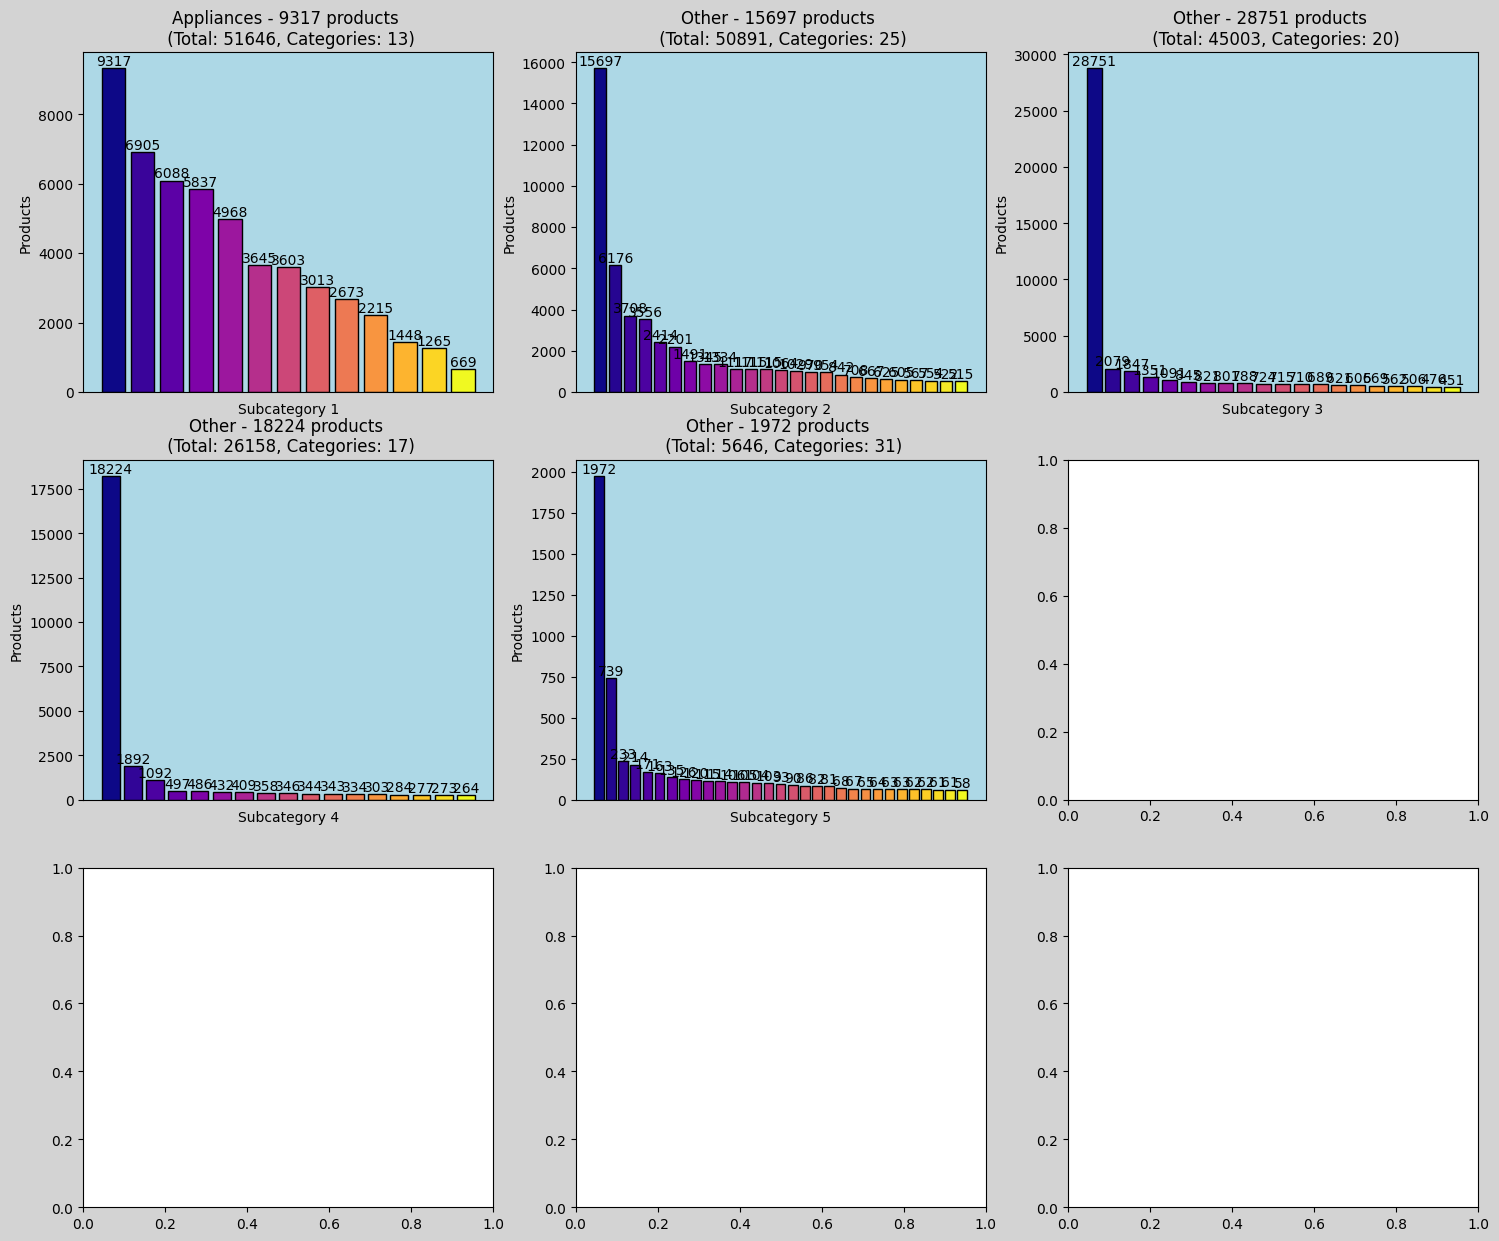

In [4]:

data_transformed = eda.process_product_data_transformed('C:/Users/rim18/OneDrive/Documentos/GitHub/Final-Project-Anyone-AI---Automated-product-categorization-for-e-commerce-with-AI/dataset/processed_data.json')
visual = eda.plot_product_data_tranformed(data_transformed)

## EDA


The study is based on the datasets `products.csv` comprising 51,646 products with 62 initial categories, 
        
### Category Selection and Filtering
  
el dataset originalmente trae anidadas las subcategorias llegando a ser mas de 6 etiquetas para un producto. por lo que se procedio a separarlas para lograr visualizar de forma clara como se componen las categorias de cada producto.
        
este dataset contenia contiene gran catidad de categorias por lo que se procedio a realiza un filtro del 1% para cada nivel, y recategorizando a esas categorias que cuentan con menos de ese porcentage asignandoles 'OTHER' para agrupar las categorias con poca cantidad de productos. para ejemplificar el primer nivel tiene 62 categorias pero las realizar este filtro se redujo a 13 categorias. 



### Categorization Analysis
        
After preprocessing, it was found that, on average, each product belongs to 3 categories. The most frequent categories are 4 and 3, while the least frequent are 1, 2, and 5.
        
### Distribution of Products by Category
     
The analysis revealed that the category with the highest number of products is \"Home Appliances\", with a maximum of 9,317 products, while the category with the lowest number is \"Best Buy Gift Cards\", with only 454 products. On average, each category contains approximately 3,896 products. The Color All-in-one Printers histogram shows a non-uniform distribution, suggesting the presence of possible biases that could influence the model.
